In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Data Science/Predict the cost to ship the sculptures/dataset/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Data Science/Predict the cost to ship the sculptures/dataset/test.csv')

In [ ]:
train1=train

In [ ]:
test.columns=[c.replace(" ","_") for c in test.columns]
train.columns=[c.replace(" ","_") for c in train.columns]

In [ ]:
# combining the test and train dataset
Cost=train.Cost
train.drop('Cost',axis=1,inplace=True)
Customer_Id=test.Customer_Id
data=train.append(test)
data.tail()

,Customer_Id,Artist_Name,Artist_Reputation,Height,Width,Weight,Material,Price_Of_Sculpture,Base_Shipping_Price,International,Express_Shipment,Installation_Included,Transport,Fragile,Customer_Information,Remote_Location,Scheduled_Date,Delivery_Date,Customer_Location
3495,fffe3200300037003100,Orlando Miller,0.36,13.0,6.0,23511.0,Marble,78.01,88.70,No,Yes,No,Airways,No,Wealthy,No,02/09/16,02/09/16,"Smithville, IA 22615"
3496,fffe390031003100,Javier Loughry,0.72,29.0,14.0,NaN,Bronze,214.85,80.28,Yes,Yes,No,Airways,No,Wealthy,No,11/26/18,11/30/18,"Kennethstad, NE 65012"
3497,fffe3200350031003700,Lashawnda Walton,0.59,12.0,6.0,NaN,Brass,8.91,19.58,No,No,Yes,Airways,No,Working Class,No,04/01/17,04/02/17,"Lake Christian, AL 95571"
3498,fffe3100380031003000,Rita Battee,NaN,17.0,9.0,565.0,Aluminium,6.75,10.89,No,Yes,Yes,Airways,No,Wealthy,No,06/28/17,06/28/17,"West Regina, UT 49761"
3499,fffe3200340037003300,Paul Jones,0.97,25.0,11.0,989903.0,Stone,4768.42,31.38,No,Yes,No,Airways,No,Working Class,No,02/19/19,02/15/19,"Carsonshire, KY 50092"


In [ ]:
data = data.drop(columns = ['Customer_Id', 'Artist_Name'])

In [ ]:
print(data.shape)
data.drop_duplicates(inplace=True)
print(data.shape)

(10000, 17)
(10000, 17)


In [ ]:
# numarical and categorical 
def divideFeatures(df):
    numberical_features = df.select_dtypes(include=[np.number])
    categorical_features = df.select_dtypes(include=[np.object])
    return numberical_features, categorical_features

In [ ]:
continuous_features, categorical_features = divideFeatures(data)

In [ ]:
continuous_features.head()

,Artist_Reputation,Height,Width,Weight,Price_Of_Sculpture,Base_Shipping_Price
0,0.26,17.0,6.0,4128.0,13.91,16.27
1,0.28,3.0,3.0,61.0,6.83,15.00
2,0.07,8.0,5.0,237.0,4.96,21.18
3,0.12,9.0,NaN,NaN,5.81,16.31
4,0.15,17.0,6.0,324.0,3.18,11.94


In [ ]:
categorical_features.head()

,Material,International,Express_Shipment,Installation_Included,Transport,Fragile,Customer_Information,Remote_Location,Scheduled_Date,Delivery_Date,Customer_Location
0,Brass,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777"
1,Brass,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072"
2,Clay,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241"
3,Aluminium,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375"
4,Aluminium,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793"


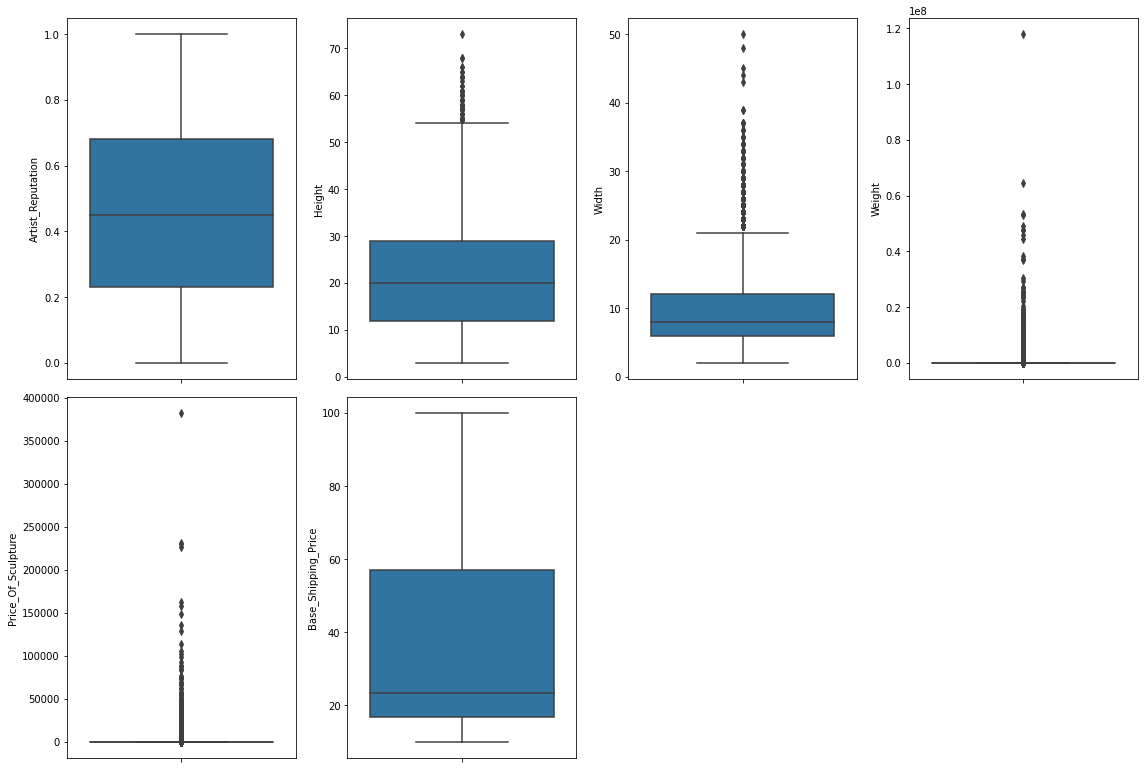

In [ ]:
#checking the outliers 
fig = plt.figure(figsize=(16,16))
for i in range(len(continuous_features.columns)):
    fig.add_subplot(3, 4, i+1)
    sns.boxplot(y=continuous_features.iloc[:,i])

plt.tight_layout()
plt.show()

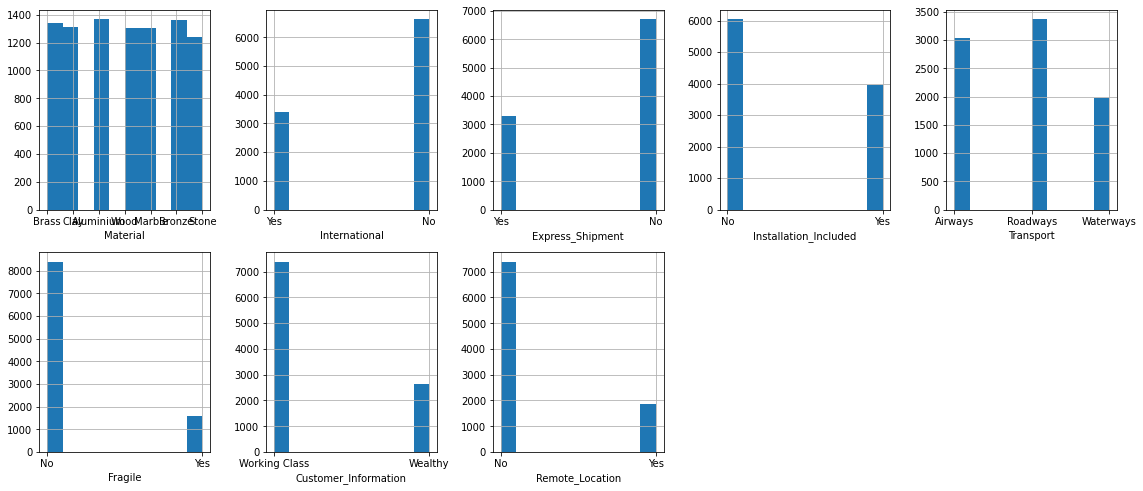

In [ ]:
# visualizing the categorical featuers

fig = plt.figure(figsize=(16,30))
for i in range(len(categorical_features.columns[:-3])):
    fig.add_subplot(9, 5, i+1)
    categorical_features.iloc[:,i].hist()
    plt.xlabel(categorical_features.columns[i])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show>

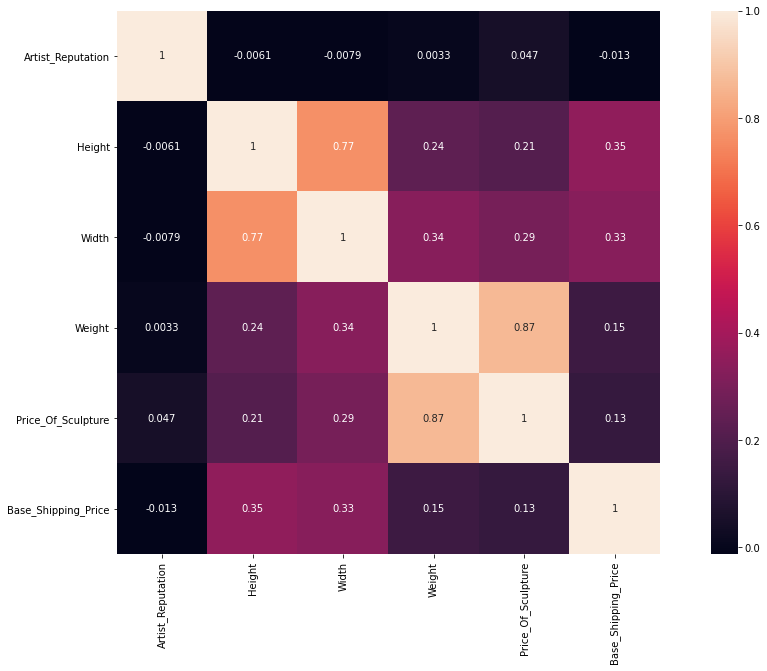

In [ ]:
corr = data.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot=True, square=True)
plt.show

In [ ]:
def fillNan(df, col, value):
    df[col].fillna(value, inplace=True)

In [ ]:
fillNan(data, 'Artist_Reputation', data['Artist_Reputation'].median())
data['Artist_Reputation'].isna().sum()

0

In [ ]:
fillNan(data, 'Height', data['Height'].median())
fillNan(data, 'Width', data['Width'].median())

In [ ]:
fillNan(data, 'Weight', data['Weight'].median())

In [ ]:
fillNan(data, 'Material', data['Material'].mode()[0])
data['Material'].isna().sum()

0

In [ ]:
fillNan(data, 'Transport', data['Transport'].mode()[0])
data['Transport'].isna().sum()

0

In [ ]:
fillNan(data, 'Remote_Location', data['Remote_Location'].mode()[0])
data['Remote_Location'].isna().sum()

0

In [ ]:
data.isnull().sum()

Artist_Reputation        0
Height                   0
Width                    0
Weight                   0
Material                 0
Price_Of_Sculpture       0
Base_Shipping_Price      0
International            0
Express_Shipment         0
Installation_Included    0
Transport                0
Fragile                  0
Customer_Information     0
Remote_Location          0
Scheduled_Date           0
Delivery_Date            0
Customer_Location        0
dtype: int64

In [ ]:
data['State'] = data['Customer_Location'].map(lambda x:x.split()[-2])

In [ ]:
data.drop(columns=['Customer_Location'], inplace=True)

In [ ]:
data['Scheduled_Date']=pd.to_datetime(data['Scheduled_Date'])
data['Delivery_Date'] = pd.to_datetime(data['Delivery_Date'])
data['schedulediff'] = (data['Delivery_Date']-data['Scheduled_Date']).map(lambda x:str(x).split()[0])

In [ ]:
data['dday'] = data['Delivery_Date'].dt.day
data['dmonth'] = data['Delivery_Date'].dt.month
data['dyear'] = data['Delivery_Date'].dt.year
data['ddayof_week'] = data['Delivery_Date'].dt.dayofweek

In [ ]:
data.drop(columns=['Scheduled_Date', 'Delivery_Date'], inplace = True, axis=1)

In [ ]:
data['schedulediff']=pd.to_numeric(data['schedulediff'])

In [ ]:
def no_of_unique_val(df):
    for col in df:
        print(f'{col} : {df[col].unique()}')

In [ ]:
continuous_data, categorical_data = divideFeatures(data)

In [ ]:
no_of_unique_val(categorical_data)

Material : ['Brass' 'Clay' 'Aluminium' 'Wood' 'Marble' 'Bronze' 'Stone']
International : ['Yes' 'No']
Express_Shipment : ['Yes' 'No']
Installation_Included : ['No' 'Yes']
Transport : ['Airways' 'Roadways' 'Waterways']
Fragile : ['No' 'Yes']
Customer_Information : ['Working Class' 'Wealthy']
Remote_Location : ['No' 'Yes']
State : ['OH' 'WY' 'WA' 'KY' 'PA' 'AL' 'WV' 'CA' 'ND' 'GA' 'DC' 'TX' 'CO' 'AE'
 'OR' 'MI' 'NM' 'AR' 'AP' 'VT' 'IA' 'MN' 'NH' 'SC' 'AA' 'OK' 'HI' 'RI'
 'LA' 'DE' 'ID' 'CT' 'MS' 'FL' 'VA' 'MA' 'KS' 'ME' 'NC' 'NV' 'MD' 'SD'
 'WI' 'MT' 'IL' 'AZ' 'AK' 'NY' 'NJ' 'TN' 'NE' 'MO' 'IN' 'UT']


In [ ]:
#binary coding
yes_no_columns = ['International', 'Express_Shipment', 'Installation_Included', 'Fragile', 'Remote_Location']

for column in yes_no_columns:
    data[column].replace({'Yes':1, 'No':0}, inplace=True)

In [ ]:
#one Hot encoding for the columns Customer Information, Transport
data = pd.get_dummies(data=data, columns = ['Customer_Information', 'Transport'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_columns=['Material', 'State']

for le_column in le_columns:
    data[le_column] = le.fit_transform(data[le_column])

In [ ]:
data.head()

,Artist_Reputation,Height,Width,Weight,Material,Price_Of_Sculpture,Base_Shipping_Price,International,Express_Shipment,Installation_Included,Fragile,Remote_Location,State,schedulediff,dday,dmonth,dyear,ddayof_week,Customer_Information_Wealthy,Customer_Information_Working Class,Transport_Airways,Transport_Roadways,Transport_Waterways
0,0.26,17.0,6.0,4128.0,1,13.91,16.27,1,1,0,0,0,38,-4,3,6,2015,2,0,1,1,0,0
1,0.28,3.0,3.0,61.0,1,6.83,15.00,0,0,0,0,0,53,-1,5,3,2017,6,0,1,0,1,0
2,0.07,8.0,5.0,237.0,3,4.96,21.18,0,0,0,1,1,50,-1,8,3,2015,6,0,1,0,1,0
3,0.12,9.0,8.0,3032.0,0,5.81,16.31,0,0,0,0,1,20,-4,20,5,2015,2,1,0,0,1,0
4,0.15,17.0,6.0,324.0,0,3.18,11.94,1,1,1,0,0,41,-4,14,12,2016,2,0,1,1,0,0


In [ ]:
data_shuffle =data.sample(frac=1, random_state=12).reset_index(drop=True)

In [ ]:
df_shuffle = data.sample(frac=1, random_state=12).reset_index(drop=True)

In [ ]:
train1.head()

,Customer_Id,Artist_Name,Artist_Reputation,Height,Width,Weight,Material,Price_Of_Sculpture,Base_Shipping_Price,International,Express_Shipment,Installation_Included,Transport,Fragile,Customer_Information,Remote_Location,Scheduled_Date,Delivery_Date,Customer_Location
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777"
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072"
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241"
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375"
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793"


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_data=scaler.transform(data)

In [ ]:
scaled_data

array([[-0.78952627, -0.38974114, -0.66121747, ...,  1.51560734,
        -0.998002  , -0.49640362],
       [-0.71103166, -1.59880314, -1.24160615, ..., -0.6598015 ,
         1.002002  , -0.49640362],
       [-1.53522508, -1.16699528, -0.85468037, ..., -0.6598015 ,
         1.002002  , -0.49640362],
       ...,
       [ 0.50563481, -0.82154899, -0.66121747, ...,  1.51560734,
        -0.998002  , -0.49640362],
       [-0.04382747, -0.38974114, -0.0808288 , ...,  1.51560734,
        -0.998002  , -0.49640362],
       [ 1.99703243,  0.30115144,  0.30609699, ...,  1.51560734,
        -0.998002  , -0.49640362]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data)
pca_samples = pca.transform(data)

In [ ]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2,3,4,5
0,-358679.040181,-118.737687,20.609254,-13.304563,1.373221,-12.648183
1,-362746.043969,-114.328968,24.196706,-28.506793,14.939652,-10.309483
2,-362570.049938,-116.695239,17.191759,-25.365241,10.733051,-7.387243
3,-359775.058699,-123.741626,22.003115,4.646095,8.089288,4.450189
4,-362483.055320,-118.721545,24.850855,-16.316428,0.314754,-1.660229


In [ ]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
X_pca=pca.transform(scaled_data)

In [ ]:
X_pca.shape

(10000, 2)

In [ ]:

X_train=data.iloc[:6500,]
y_train=Cost
test_X=data.iloc[6500:,]
seed=7

AttributeError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,random_state=seed)

In [ ]:
# Importing Regression Model
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

# performance Matrix
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:

# # Predicting Cross Validation Score the Test set results
# cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
# print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

R2_score (train):  0.22011033657784862
R2_score (test):  0.2406431082526378
RMSE:  160494.9697864255


In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
# print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

R2_score (train):  1.0
R2_score (test):  0.044536135816120925
RMSE:  180030.29338238473


In [ ]:
# Fitting the Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor_rf.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
#cv_rf = cross_val_score(estimator = regressor_rf, X = X_scaled, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
# print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

R2_score (train):  0.8856866924223548
R2_score (test):  0.4861835345887906
RMSE:  132020.8317528598
